In [1]:
pip install unidecode

     |████████████████████████████████| 245kB 4.8MB/s 


In [2]:
# Data Structures
import numpy  as np
import pandas as pd
import json

# Corpus Processing
import string
import re
import csv
import nltk.corpus
from unidecode                        import unidecode
from nltk.tokenize                    import word_tokenize
from nltk                             import SnowballStemmer
from nltk.corpus                      import wordnet as wn
from nltk.stem                        import WordNetLemmatizer
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.preprocessing            import normalize
from collections                      import Counter

# K-Means
from sklearn import cluster
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans

# Visualization and Analysis
import matplotlib.pyplot  as plt
import matplotlib.cm      as cm
import seaborn            as sns
from sklearn.datasets                 import make_blobs
from sklearn.metrics                  import silhouette_samples, silhouette_score
from wordcloud                        import WordCloud
# from jupyterthemes                    import jtplot
# jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

**Mount the drive**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Read the tokenized data set**

In [4]:
Data = pd.read_csv("/content/drive/My Drive/tweets/Final_tokenized_data.csv") 
Data.head()

,user,id,tokenized_tweets
0,12,2.000000e+01,twttr set
1,12,3.230000e+17,amaze wow coachella vine
2,16,3.300000e+17,back climb love maybe break even go
3,17,3.300000e+17,sweet victory warrior
4,291,3.300000e+17,asshole ridiculous eff like knicks know nycers...


In [5]:
Data.dtypes

user                  int64
id                  float64
tokenized_tweets     object
dtype: object

**Make all tokenized and preprocessed data as strings (sometimes null values get a float from numpy)**

In [6]:
Data[['tokenized_tweets']] = Data[['tokenized_tweets']].astype(str)

Data.dtypes

user                  int64
id                  float64
tokenized_tweets     object
dtype: object

**here the texts are joined (all tweets from one user is in one column)**

In [7]:
data = Data.groupby(['user'])['tokenized_tweets'].transform(lambda x : ' '.join(x)) 
data.head()

0                   twttr set amaze wow coachella vine
1                   twttr set amaze wow coachella vine
2                  back climb love maybe break even go
3                                sweet victory warrior
4    asshole ridiculous eff like knicks know nycers...
Name: tokenized_tweets, dtype: object

**make a list from tweets**

In [8]:
# corpus_copy_list = data.tolist()
corpus_copy_list = Data['tokenized_tweets'].tolist()

**TfidfVectorizer with most used 5000**

In [9]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(corpus_copy_list)

In [10]:
X.shape

(1048575, 5000)

**Use the elbow method to select the number of clusters *mini batch kmeans*** 


2 Done
3 Done
4 Done
5 Done
6 Done
7 Done
8 Done
9 Done
10 Done
11 Done
12 Done
13 Done
14 Done
15 Done


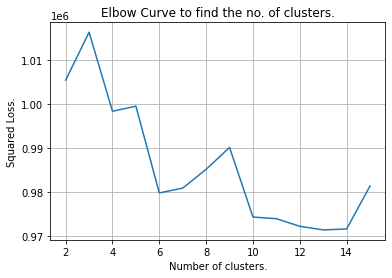

In [21]:
def elbow(words_vector):
    num_cluster = [x for x in range(2,16)]
    
    squared_errors = []
    for cluster in num_cluster:
        print(cluster, "Done")
        kmeans = MiniBatchKMeans(n_clusters = cluster,batch_size=20).fit(words_vector) # Train Cluster
        squared_errors.append(kmeans.inertia_) # Appending the squared loss obtained in the list
        
    optimal_clusters = np.argmin(squared_errors)# As argmin return the index of minimum loss. 
    plt.plot(num_cluster, squared_errors)
    plt.title("Elbow Curve to find the no. of clusters.")
    plt.xlabel("Number of clusters.")
    plt.ylabel("Squared Loss.")
    plt.grid(True)
    plt.show()
    return optimal_clusters

optimal_clusters_elbow = elbow(X)

**Mini Batch Kmeans**

In [12]:
# Define the k-means clustering function which will call sklearn's KMeans function
def k_means(feature_matrix, num_clusters):
    km = MiniBatchKMeans(n_clusters=num_clusters,
                max_iter=10000)
    km.fit(feature_matrix)
    clusters = km.labels_
    return km, clusters

In [38]:
num_clusters=31
km, clusters=k_means(X, num_clusters)

In [39]:
data["cluster"]=clusters

In [40]:
Data['Cluster'] = clusters 
Data.head()

,user,id,tokenized_tweets,Cluster
0,12,2.000000e+01,twttr set,7
1,12,3.230000e+17,amaze wow coachella vine,7
2,16,3.300000e+17,back climb love maybe break even go,27
3,17,3.300000e+17,sweet victory warrior,7
4,291,3.300000e+17,asshole ridiculous eff like knicks know nycers...,4


**Distribution of instances in each cluster**

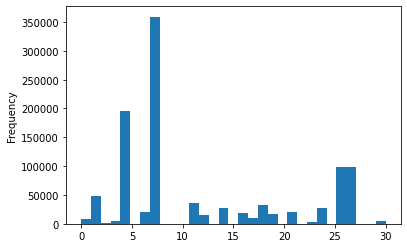

In [41]:
Data['Cluster'].plot(bins=num_clusters, kind='hist')

**Distribution of instances in each cluster**

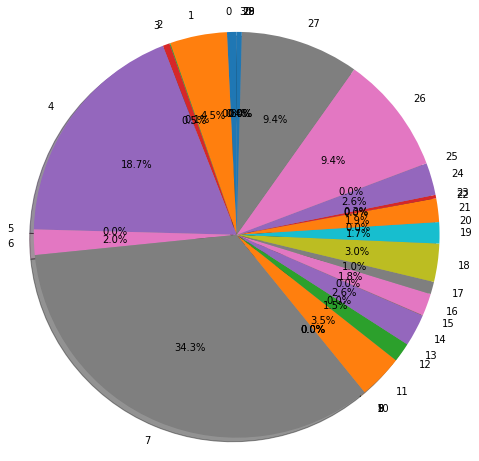

In [42]:
p = Data.groupby(['Cluster']).count()*100/len(clusters)
# explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(8, 8))
ax1.pie(p["user"],  labels=p.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

**Use train and test split using train_test_split in sklearn**

**1.silhouette_score with sample**

**2.silhouette_samples**


2 Done, silhouette_score
For n_clusters = 2 The average silhouette_score is : 0.006782212370854892
3 Done, silhouette_score
For n_clusters = 3 The average silhouette_score is : 0.009042017497196518
4 Done, silhouette_score
For n_clusters = 4 The average silhouette_score is : 0.029432768457394707
5 Done, silhouette_score
For n_clusters = 5 The average silhouette_score is : 0.033529410633453646
6 Done, silhouette_score
For n_clusters = 6 The average silhouette_score is : 0.01877072216884404
31 Done, silhouette_score
For n_clusters = 31 The average silhouette_score is : 0.04217226272123938


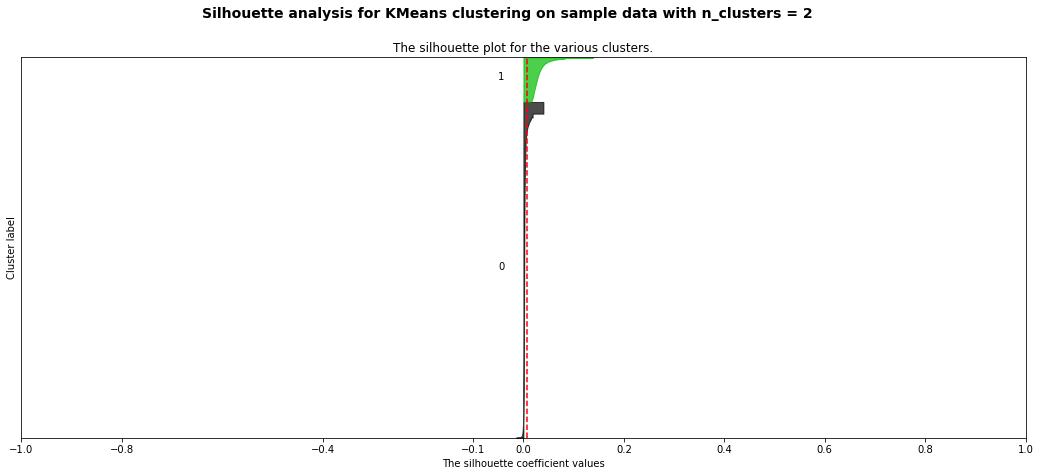

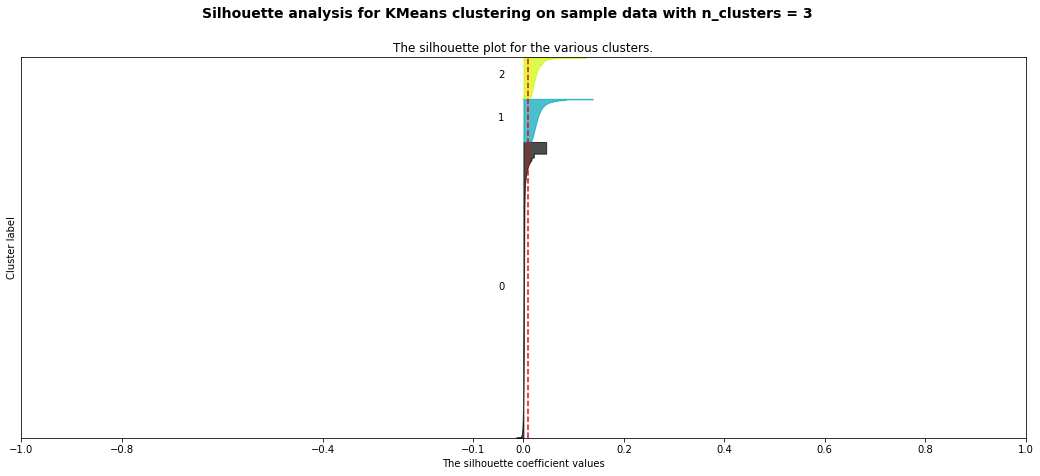

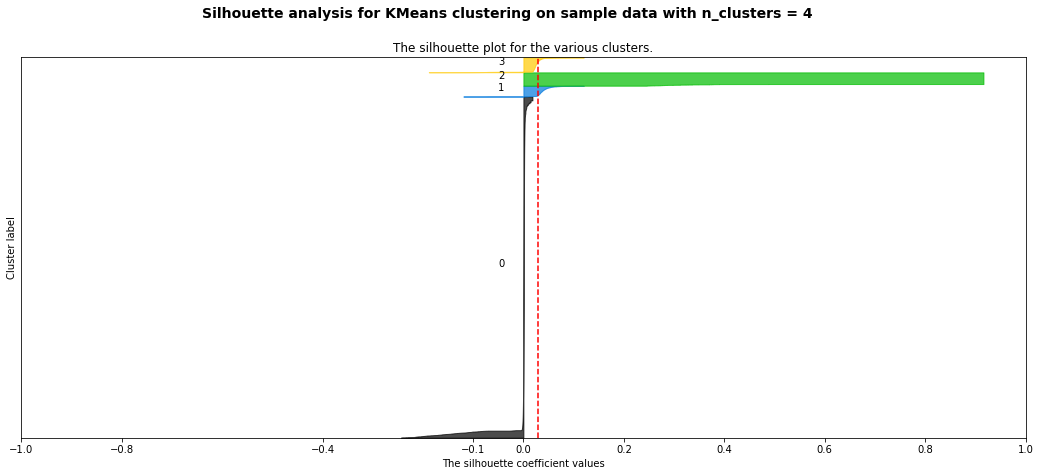

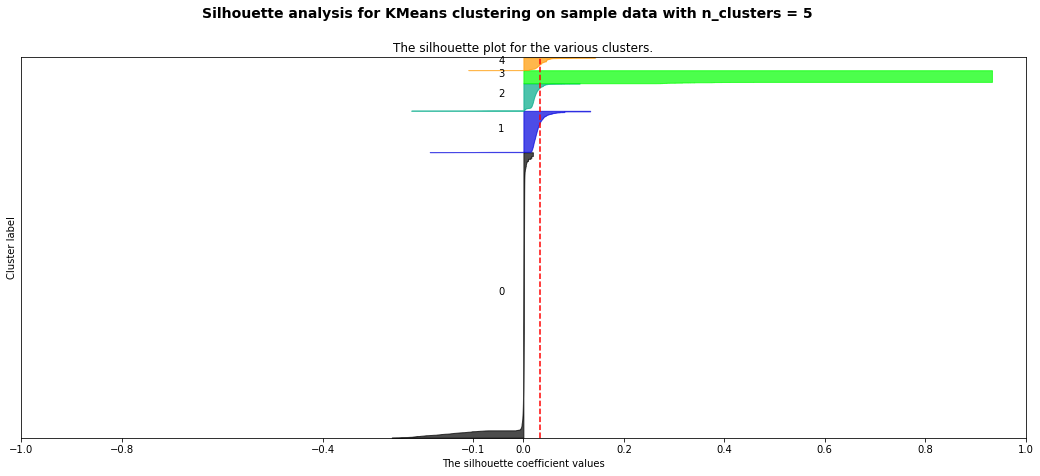

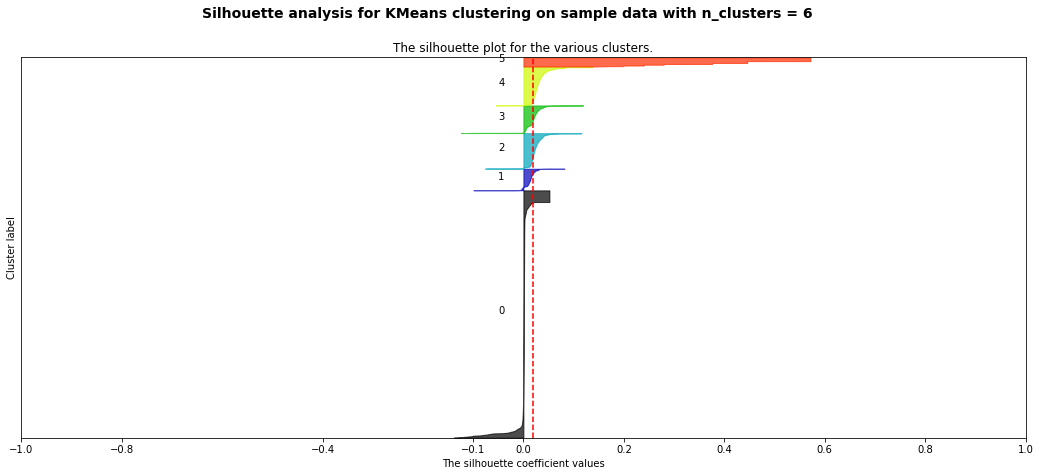

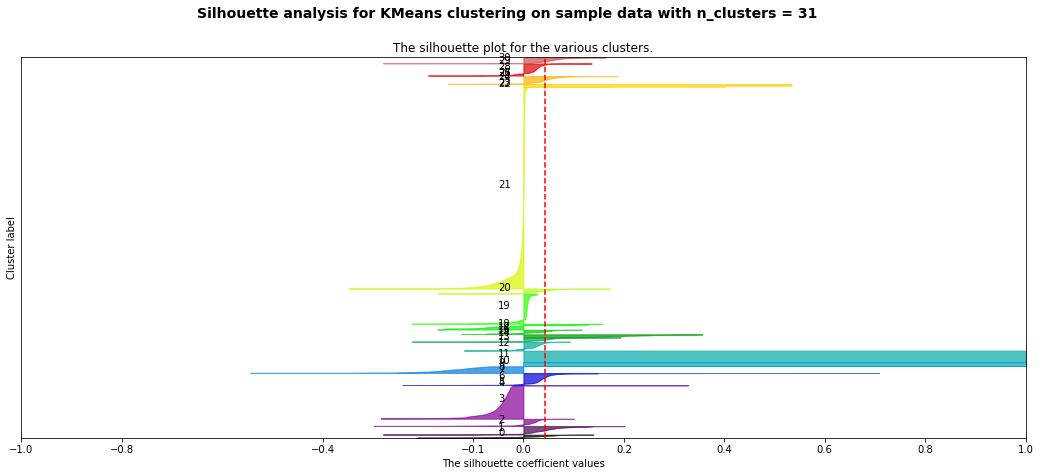

In [43]:
from sklearn.model_selection import train_test_split
range_n_clusters = [2, 3, 4, 5, 6,31]
datasplit=0.03
for n_clusters in range_n_clusters:
    print(n_clusters,end=" ")
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(Data)*datasplit + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.

    clusterer, cluster_labels_=k_means(X, n_clusters)
    print("Done, silhouette_score")
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    X_train, X_test, y_train, cluster_labels = train_test_split(X, cluster_labels_, test_size=datasplit, random_state=42)
    silhouette_avg = silhouette_score(X_test, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    
    sample_silhouette_values = silhouette_samples(X_test, cluster_labels,metric='euclidean') #metric='manhattan'

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-1,-0.8,-0.4,-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()